<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/07_Universal_Sentence_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universal Sentence Encoder (EMNLP)

## 초록

- 문장을 embedding vector로 encoding하는 모델, 특히 여러 NLP 태스크에 적용할 수 있는 전이 학습을 목표함.

- pre-trained word embedding을 활용한 단어 수준의 전이학습 baseline과 전이학습을 사용하지 않는 baseline을 활용해 비교 실험 실시함.

- 문장 embedding을 활용한 전이학습이 단어 수준의 전이학습보다 뛰어난 결과를 보여주고, 적은 양의 지도 학습 데이터로도 좋은 성능을 나타냄.


### 배경지식 


1. Word embedding
    - Word2vec 
        1. Efficient Estimation of Word Representation in Vector Space(2013)
        2. 단어를 word embedding을 표현하는 방법론
        3. CBOW 모델(주변 단어로부터 목표 단어 예측)과 Skip-gram 모델(중심 단어로부터 주변 단어 예측)

    - GloVe
        1. Global Bectors for Word Representation(2014)
        2. Word2vec : 주변 단어 중심으로 학습함으로써 말뭉치의 전체적인 통계 정보를 반영하지 못하는 문제가 존재
        3. 중심 단어와 주변 단어의 내적이 전체 말뭉치에서의 동시 발생 확률이 되도록 하는 목적 함수 설정 

2. Sentence Embedding
    - 문장 수준의 embedding 기법
    - Doc2Vec(2014)
        1. Word2vec에서 확장된 개념으로, 문장-문단-문서 단위로 vector 계산
        2. paragraph ID를 토큰으로 사용
        3. PV-DM 모델(문장 다음에 오는 단어 예측)과 PV-DBOW 모델(paragraph ID만을 가지고 단어 예측)

    - InferSent(2018)
        1. entailment/contradiction/neutral로 라벨링된 영어 자연어 데이터로 지도 학습된 모델 
        2. 사전학습된 word embedding으로 GloVe활용하는 버전1, fastText를 활용하는 버전2 

    - Sentence-BERT(2019)
        1. Siamese Network를 사용하여 BERT를 변형한 Bi-encoder 구조
        2. 10,000개의 문장을 고정된 사이즈의 벡터로 표현
        3. Augmented SBERT (NACCL 2021)
    
    - Universal Sentence Encoder(2018)

3. Skip -Thoughts 
    - 고정된 길이로 문장을 표현하는 비지도 방식의 신경망 모델 
    - 자연어 말뭉치에서 문장의 순서를 정보로 사용
    - 감성 분류, 유사도 계산 등 여러 downstream tasks에 사용할 수 있음.
    - 문장을 sequential하게 처리하는 recurrent network 사용(GRU, LSTM)
    - Encoder : i번째 문장 x(i)를 받아 고정된 길이의 표현 z(i)으로 생성
    - Decoder
        1. Prev : embedding z(i)를 받아 문장 x(i-1)를 생성 
        2. Next : embedding z(i)를 받아 문장 x(i+1)를 생성 



## Introduction

1. 제한적인 NLP 학습 데이터, 비용이 많이 드는 annotation 작업
    - word2vec, GloVe와 같은 pre-trained word embeddings를 사용해 한계를 극복하려는 시도 
    - 최근에는 pre-trained sentence level embedding을 활용한 transfer task
    - 본 논문에서는 sentence embedding을 위한 두 개 모델을 제시하고, 다양한 사이즈의 transfer task 학습 데이터로 실험함으로써 transfer task performance와 훈련 셋 사이즈 간의 관계를 파악 

2. 본 논문의 sentence embedding을 사용해, 매우 적은 학습 데이터로도 좋은 성능
    - 다양한 길이의 문장을 활용하여 컴퓨팅 리소스 측면에서 비교 실험



## Encoders 

### Model Toolkit 

1. Model Design
    - 서로 다른 설계 목표를 가지고 두 가지 종류의 모델링을 진행

    - 서로 다른 특징을 만들어낸 모델의 근본적 차이
        1. 임베딩을 이루는 구성 요소가 다름

    - 임베딩 구성요소를 이루는 방식 2가지 
        1. Unorderd
            - 단어의 순서나 문장의 구조를 고려하지 않은 채, 출현빈도에 초점을 맞춤
            - 구성요소가 단순한만큼, 컴퓨팅 자원 소모가 적고 학습시간도 적음.
            - 문장의 길이에 따라 학습시간 컴퓨팅 자원 소모 및 학습시간 선형적으로 증가

        2. Syntactic
            - 단어의 순서나 문장 구원을 요조 등 다양한 요소를 고려하여 임베딩을 진행
            - 그만큼, 더 긴 시간의 학습 시간 및 컴퓨팅 자원 소모
            - 문장의 길이가 증가할 경우, 급진적으로 컴퓨팅 자원 소모 및 학습 시간 증가 


2. Two Model
    1. Transformer를 사용한 모델 (Syntactic)
        - 높은 성능을 목표
        - 높은 정확도, 높은 컴퓨팅 자원 소모

    2. DAN(Deep Average Network)를 사용한 모델 (Unorderd)
        - 효율적인 구동 및 운영을 목표 
        - 조금 낮은 정확도, 낮은 컴퓨팅 자원 소모 

3. Sentence Similarity Task
    1. 문장 유사도 테스트에서도 사용 가능
    2. semantic textual similarity(STS) 벤치마크에서 매우 훌륭한 성능을 보였음.
    3. Gradient based update를 통해 특정 태스크에 최적화될 수 있음.

    


### [Synthetic] Transformer based sentence encoder



In [ ]:
모델 특징 
    - 트랜스포머 아키텍처 기반 서브 그래프 문장 임베딩을 진행
    - 문장에서의 순서 및 단어의 특징을 함께 고려 
    - 어텐션 방식을 이용해 context aware representation을 생성

공통적 사항
    - 문맥 벡터들은 고정된 길이의 문장 인코딩 벡터로 변환됨
    - 인풋은 PTB 토크아니저로 토큰화된 String이며, 아웃풋은 512차원 문장 임베딩된 벡터
    

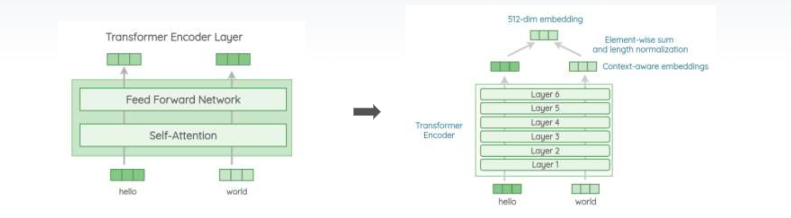

### [Unorderd] DAN based sentence encoder 

모델 특징 
    - 단어와 바이그램의 임베딩을 함께 고려하여 평균내어 인풋 임베딩을 생성
    - 최종적으로, 인풋을 DNN 모델에 통과시켜 문장 임베딩을 생성

공통적 사항
    - 문맥 벡터들은 고정된 길이의 문장 인코딩 벡터로 변환됨
    - 인풋 PTB 토크나이저로 토큰화된 문장이며, 아웃풋은 512차원 문장 임베딩된 벡터 



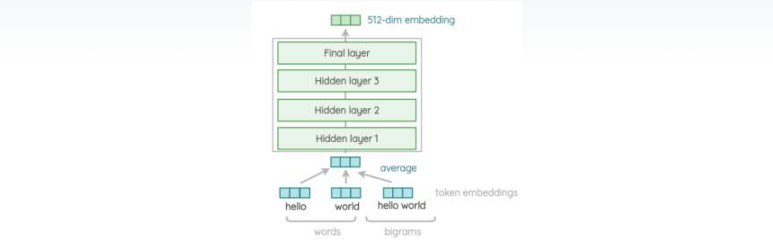

### Training

1. Multitask Learning
    - 하나의 임베딩 모델로 다양한 다운스트림 태스크를 진행할 수 있도록 설계
    - 지원하는 태스크
        - [비지도학습] Skip Thought와 비슷한 형태의 태스크
        - [지도 학습 - 대화] input - response 형태의 대화형 태스크
        - [지도 학습 - 분류] classification 기반의 태스크

2. Training Data 
    - 비지도 학습에 필요한 데이터 수집
    - 위키피디아, 웹뉴스, QnA, 토론 포럼 등 다양한 웹소스로부터 수집하여 학습 
    - 비지도 학습 성능 향상을 위해 지도 학습 데이터도 학습
        - SNLI(Stanford natural Laguage Inference) corpus 사용
        - 전이 학습 선능 향상에 기여할 것으로 기대
        

### Experiments 

1. MR : Movie review snippet sentiment on a five start scale

2. CR : Sentiment of sentences mined from customer review

3. SUBJ : Subjectivity of sentences from movie reviews and plot summaries

4. MPQA : Phrase level opinion polarity from news data 

5. TREC : Fine grained question classification sourced from TREC

6. SST : Binary phrase level sentiment classification

7. STS Benchmeark : Semantic textual similarity (STS) between sentence pairs scored by Pearson correlation with human judgments

8. WEAT : Word pairs from the psychology literature on implicit association tests (IAT) that are used to characterize model bias 




1. 다양한 transfer tasks 성능 비교 
2. training data의 양에 따라서 성능 비교 
3. batch size , 문장의 길이와 컴퓨팅 자원 사용량 비교 
4. 단어 간 관계를 파악하는 tasks 에서 성능 비교 


결과적으로 워드 임베딩보다 문장 임베딩이 좋은 성능을 보였고
두 개를 같이 사용하는 것이 가장 효과가 좋았다. 


참고 : https://www.youtube.com/watch?v=zKi1kxdLvSg